# Performance Metrics for StockPredictionPro

This notebook provides detailed implementations of critical performance metrics for evaluating stock price prediction models and trading strategies.

**Metrics Categories:**
- **Statistical Regression Metrics**: MSE, RMSE, MAE, R², MAPE
- **Classification Metrics**: Accuracy, Precision, Recall, F1-Score, AUC-ROC
- **Financial Trading Metrics**: Sharpe ratio, Sortino ratio, Calmar ratio, Maximum drawdown
- **Risk Assessment Metrics**: VaR, CVaR, Beta, Alpha
- **Model Validation Metrics**: Cross-validation scores, Information criteria

This comprehensive metric suite enables consistent evaluation of all StockPredictionPro models and trading strategies.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from scipy import stats
import warnings

sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
%matplotlib inline

warnings.filterwarnings('ignore')

print('✅ Advanced performance metrics libraries loaded')
print('📊 Ready for comprehensive model evaluation')


✅ Advanced performance metrics libraries loaded
📊 Ready for comprehensive model evaluation


In [2]:
class RegressionMetrics:
    """Comprehensive regression performance metrics for stock prediction"""
    
    @staticmethod
    def mean_squared_error(y_true, y_pred):
        """Mean Squared Error - Penalizes large errors heavily"""
        return mean_squared_error(y_true, y_pred)
    
    @staticmethod
    def root_mean_squared_error(y_true, y_pred):
        """Root Mean Squared Error - In same units as target"""
        return np.sqrt(mean_squared_error(y_true, y_pred))
    
    @staticmethod
    def mean_absolute_error(y_true, y_pred):
        """Mean Absolute Error - Robust to outliers"""
        return mean_absolute_error(y_true, y_pred)
    
    @staticmethod
    def mean_absolute_percentage_error(y_true, y_pred):
        """Mean Absolute Percentage Error - Scale-independent"""
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    @staticmethod
    def r2_score(y_true, y_pred):
        """R² Score - Coefficient of determination"""
        return r2_score(y_true, y_pred)
    
    @staticmethod
    def adjusted_r2_score(y_true, y_pred, n_features):
        """Adjusted R² - Accounts for number of features"""
        n = len(y_true)
        r2 = r2_score(y_true, y_pred)
        return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    
    @staticmethod
    def directional_accuracy(y_true, y_pred):
        """Directional Accuracy - Predicts direction correctly"""
        true_direction = np.sign(np.diff(y_true))
        pred_direction = np.sign(np.diff(y_pred))
        return np.mean(true_direction == pred_direction)
    
    @staticmethod
    def calculate_all_regression_metrics(y_true, y_pred, n_features=None):
        """Calculate all regression metrics at once"""
        metrics = {
            'MSE': RegressionMetrics.mean_squared_error(y_true, y_pred),
            'RMSE': RegressionMetrics.root_mean_squared_error(y_true, y_pred),
            'MAE': RegressionMetrics.mean_absolute_error(y_true, y_pred),
            'MAPE': RegressionMetrics.mean_absolute_percentage_error(y_true, y_pred),
            'R²': RegressionMetrics.r2_score(y_true, y_pred),
            'Directional_Accuracy': RegressionMetrics.directional_accuracy(y_true, y_pred)
        }
        
        if n_features is not None:
            metrics['Adjusted_R²'] = RegressionMetrics.adjusted_r2_score(y_true, y_pred, n_features)
        
        return metrics

print('✅ Comprehensive regression metrics class defined')


✅ Comprehensive regression metrics class defined


In [3]:
class ClassificationMetrics:
    """Advanced classification metrics for trading signal evaluation"""
    
    @staticmethod
    def accuracy_score(y_true, y_pred):
        """Overall accuracy of predictions"""
        return accuracy_score(y_true, y_pred)
    
    @staticmethod
    def precision_score(y_true, y_pred, average='weighted'):
        """Precision - True positives / (True positives + False positives)"""
        return precision_score(y_true, y_pred, average=average, zero_division=0)
    
    @staticmethod
    def recall_score(y_true, y_pred, average='weighted'):
        """Recall - True positives / (True positives + False negatives)"""
        return recall_score(y_true, y_pred, average=average, zero_division=0)
    
    @staticmethod
    def f1_score(y_true, y_pred, average='weighted'):
        """F1 Score - Harmonic mean of precision and recall"""
        return f1_score(y_true, y_pred, average=average, zero_division=0)
    
    @staticmethod
    def balanced_accuracy(y_true, y_pred):
        """Balanced accuracy for imbalanced datasets"""
        from sklearn.metrics import balanced_accuracy_score
        return balanced_accuracy_score(y_true, y_pred)
    
    @staticmethod
    def matthews_correlation_coefficient(y_true, y_pred):
        """Matthews Correlation Coefficient - Good for imbalanced data"""
        from sklearn.metrics import matthews_corrcoef
        return matthews_corrcoef(y_true, y_pred)
    
    @staticmethod
    def classification_report_dict(y_true, y_pred):
        """Detailed classification report"""
        return classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    
    @staticmethod
    def calculate_all_classification_metrics(y_true, y_pred):
        """Calculate all classification metrics at once"""
        metrics = {
            'Accuracy': ClassificationMetrics.accuracy_score(y_true, y_pred),
            'Precision': ClassificationMetrics.precision_score(y_true, y_pred),
            'Recall': ClassificationMetrics.recall_score(y_true, y_pred),
            'F1_Score': ClassificationMetrics.f1_score(y_true, y_pred),
            'Balanced_Accuracy': ClassificationMetrics.balanced_accuracy(y_true, y_pred),
            'MCC': ClassificationMetrics.matthews_correlation_coefficient(y_true, y_pred)
        }
        return metrics

print('✅ Advanced classification metrics class defined')


✅ Advanced classification metrics class defined


In [7]:
class FinancialMetrics:
    """Professional financial performance metrics for trading strategies"""
    
    @staticmethod
    def total_return(returns):
        """Total return over the period"""
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        return (1 + returns).prod() - 1
    
    @staticmethod
    def annualized_return(returns, periods_per_year=252):
        """Annualized return"""
        total_ret = FinancialMetrics.total_return(returns)
        years = len(returns) / periods_per_year
        return (1 + total_ret) ** (1 / years) - 1
    
    @staticmethod
    def volatility(returns, periods_per_year=252):
        """Annualized volatility"""
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        return returns.std() * np.sqrt(periods_per_year)
    
    @staticmethod
    def sharpe_ratio(returns, risk_free_rate=0.02, periods_per_year=252):
        """Sharpe Ratio - Risk-adjusted return"""
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        excess_returns = returns - (risk_free_rate / periods_per_year)
        return np.sqrt(periods_per_year) * excess_returns.mean() / returns.std()
    
    @staticmethod
    def sortino_ratio(returns, risk_free_rate=0.02, periods_per_year=252):
        """Sortino Ratio - Downside risk-adjusted return"""
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        excess_returns = returns - (risk_free_rate / periods_per_year)
        downside_returns = returns[returns < 0]
        downside_std = downside_returns.std() if len(downside_returns) > 0 else returns.std()
        return np.sqrt(periods_per_year) * excess_returns.mean() / downside_std
    
    @staticmethod
    def calmar_ratio(returns, periods_per_year=252):
        """Calmar Ratio - Return vs Maximum Drawdown"""
        annual_return = FinancialMetrics.annualized_return(returns, periods_per_year)
        max_dd = FinancialMetrics.maximum_drawdown(returns)
        return annual_return / abs(max_dd) if max_dd != 0 else 0
    
    @staticmethod
    def maximum_drawdown(returns):
        """Maximum Drawdown - Largest peak-to-trough decline"""
        # FIXED: Convert numpy array to pandas Series if needed
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        
        cumulative = (1 + returns).cumprod()
        rolling_max = cumulative.expanding().max()
        drawdowns = (cumulative - rolling_max) / rolling_max
        return drawdowns.min()
    
    @staticmethod
    def value_at_risk(returns, confidence_level=0.05):
        """Value at Risk - Potential loss at given confidence level"""
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        return np.percentile(returns, confidence_level * 100)
    
    @staticmethod
    def conditional_value_at_risk(returns, confidence_level=0.05):
        """Conditional VaR - Expected loss beyond VaR"""
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        var = FinancialMetrics.value_at_risk(returns, confidence_level)
        return returns[returns <= var].mean()
    
    @staticmethod
    def win_rate(returns):
        """Percentage of profitable periods"""
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        return (returns > 0).mean()
    
    @staticmethod
    def profit_factor(returns):
        """Ratio of gross profits to gross losses"""
        if isinstance(returns, np.ndarray):
            returns = pd.Series(returns)
        profits = returns[returns > 0].sum()
        losses = abs(returns[returns < 0].sum())
        return profits / losses if losses != 0 else np.inf
    
    @staticmethod
    def calculate_all_financial_metrics(returns, risk_free_rate=0.02, periods_per_year=252):
        """Calculate all financial metrics at once"""
        # FIXED: Ensure returns is pandas Series
        if isinstance(returns, (list, np.ndarray)):
            returns = pd.Series(returns)
        
        metrics = {
            'Total_Return': FinancialMetrics.total_return(returns),
            'Annualized_Return': FinancialMetrics.annualized_return(returns, periods_per_year),
            'Volatility': FinancialMetrics.volatility(returns, periods_per_year),
            'Sharpe_Ratio': FinancialMetrics.sharpe_ratio(returns, risk_free_rate, periods_per_year),
            'Sortino_Ratio': FinancialMetrics.sortino_ratio(returns, risk_free_rate, periods_per_year),
            'Calmar_Ratio': FinancialMetrics.calmar_ratio(returns, periods_per_year),
            'Maximum_Drawdown': FinancialMetrics.maximum_drawdown(returns),
            'VaR_5%': FinancialMetrics.value_at_risk(returns, 0.05),
            'CVaR_5%': FinancialMetrics.conditional_value_at_risk(returns, 0.05),
            'Win_Rate': FinancialMetrics.win_rate(returns),
            'Profit_Factor': FinancialMetrics.profit_factor(returns)
        }
        return metrics

print('✅ Comprehensive financial metrics class defined with numpy array handling')


✅ Comprehensive financial metrics class defined with numpy array handling


In [8]:
class MetricsVisualizer:
    """Advanced visualization for performance metrics"""
    
    @staticmethod
    def plot_regression_metrics(y_true, y_pred, title="Regression Performance"):
        """Comprehensive regression performance visualization"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle(f'{title} - Comprehensive Analysis', fontsize=16, fontweight='bold')
        
        # 1. Predictions vs Actual
        axes[0, 0].scatter(y_true, y_pred, alpha=0.6, color='blue')
        axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        axes[0, 0].set_xlabel('Actual Values')
        axes[0, 0].set_ylabel('Predicted Values')
        axes[0, 0].set_title('Predictions vs Actual')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Residuals
        residuals = y_true - y_pred
        axes[0, 1].scatter(y_pred, residuals, alpha=0.6, color='green')
        axes[0, 1].axhline(y=0, color='red', linestyle='--')
        axes[0, 1].set_xlabel('Predicted Values')
        axes[0, 1].set_ylabel('Residuals')
        axes[0, 1].set_title('Residual Plot')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Residual Distribution
        axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
        axes[1, 0].axvline(residuals.mean(), color='red', linestyle='--', label=f'Mean: {residuals.mean():.4f}')
        axes[1, 0].set_xlabel('Residuals')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Residual Distribution')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Time Series of Actual vs Predicted
        axes[1, 1].plot(y_true, label='Actual', alpha=0.8, linewidth=2)
        axes[1, 1].plot(y_pred, label='Predicted', alpha=0.8, linewidth=2)
        axes[1, 1].set_xlabel('Time')
        axes[1, 1].set_ylabel('Values')
        axes[1, 1].set_title('Time Series Comparison')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    @staticmethod
    def plot_financial_metrics(returns, title="Financial Performance"):
        """Comprehensive financial performance visualization"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle(f'{title} - Financial Analysis', fontsize=16, fontweight='bold')
        
        # 1. Cumulative Returns
        cumulative_returns = (1 + returns).cumprod()
        axes[0, 0].plot(cumulative_returns, linewidth=2, color='green')
        axes[0, 0].set_title('Cumulative Returns')
        axes[0, 0].set_ylabel('Cumulative Return')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Drawdown
        rolling_max = cumulative_returns.expanding().max()
        drawdown = (cumulative_returns - rolling_max) / rolling_max
        axes[0, 1].fill_between(range(len(drawdown)), drawdown, 0, alpha=0.3, color='red')
        axes[0, 1].plot(drawdown, color='red', linewidth=1)
        axes[0, 1].set_title(f'Drawdown (Max: {drawdown.min():.2%})')
        axes[0, 1].set_ylabel('Drawdown')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Returns Distribution
        axes[1, 0].hist(returns * 100, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1, 0].axvline(returns.mean() * 100, color='red', linestyle='--', 
                          label=f'Mean: {returns.mean()*100:.2f}%')
        axes[1, 0].set_xlabel('Daily Returns (%)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Returns Distribution')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Rolling Sharpe Ratio
        rolling_sharpe = returns.rolling(window=30).mean() / returns.rolling(window=30).std() * np.sqrt(252)
        axes[1, 1].plot(rolling_sharpe, linewidth=2, color='purple')
        axes[1, 1].axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Sharpe = 1')
        axes[1, 1].set_title('Rolling 30-Day Sharpe Ratio')
        axes[1, 1].set_ylabel('Sharpe Ratio')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

print('✅ Advanced metrics visualization class defined')


✅ Advanced metrics visualization class defined


COMPREHENSIVE PERFORMANCE METRICS DEMONSTRATION
📊 REGRESSION METRICS EXAMPLE:
----------------------------------------
MSE                 : 1.001788
RMSE                : 1.000894
MAE                 : 0.800661
MAPE                : 0.800565
R²                  : -61.924608
Directional_Accuracy: 0.525896
Adjusted_R²         : -64.535588

🎯 CLASSIFICATION METRICS EXAMPLE:
----------------------------------------
Accuracy            : 0.547619
Precision           : 0.563959
Recall              : 0.547619
F1_Score            : 0.554201
Balanced_Accuracy   : 0.520787
MCC                 : 0.040378

💰 FINANCIAL METRICS EXAMPLE:
----------------------------------------
Total_Return        : 83.98%
Annualized_Return   : 83.98%
Volatility          : 0.251864
Sharpe_Ratio        : 2.469632
Sortino_Ratio       : 3.871722
Calmar_Ratio        : 5.939232
Maximum_Drawdown    : -14.14%
VaR_5%              : -0.023832
CVaR_5%             : -0.031908
Win_Rate            : 59.13%
Profit_Factor       : 

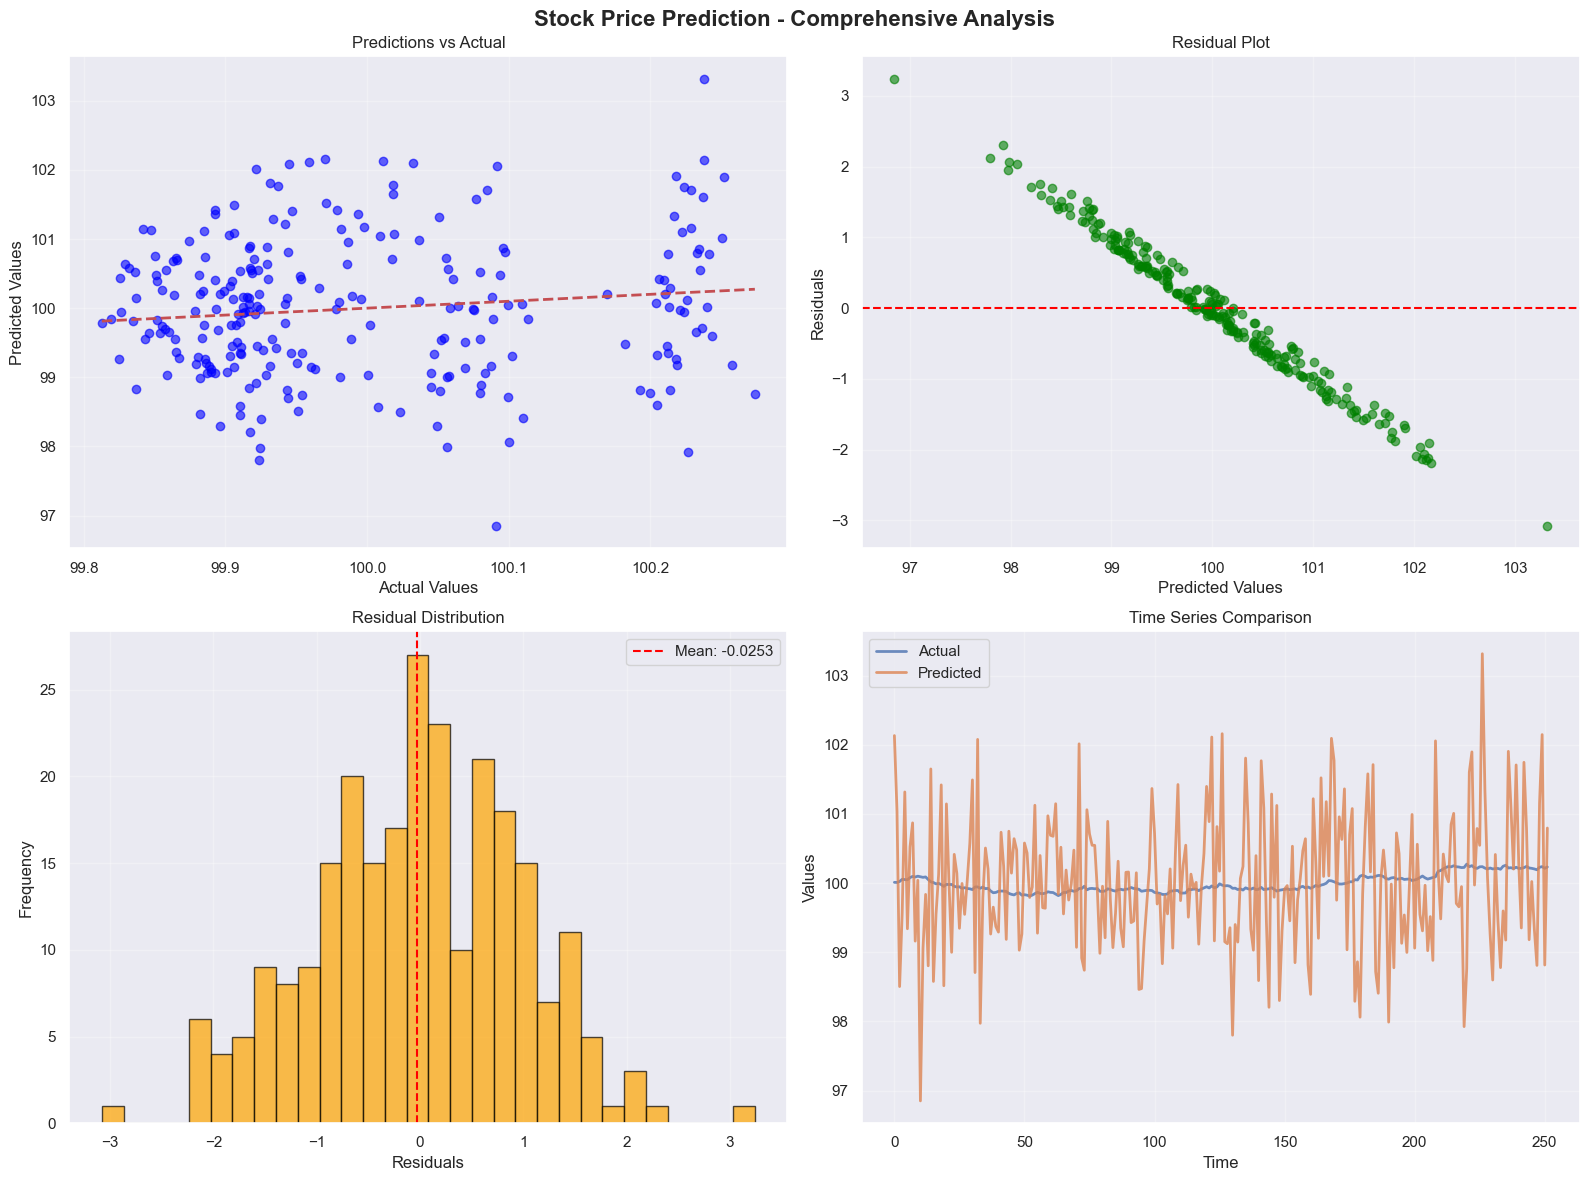

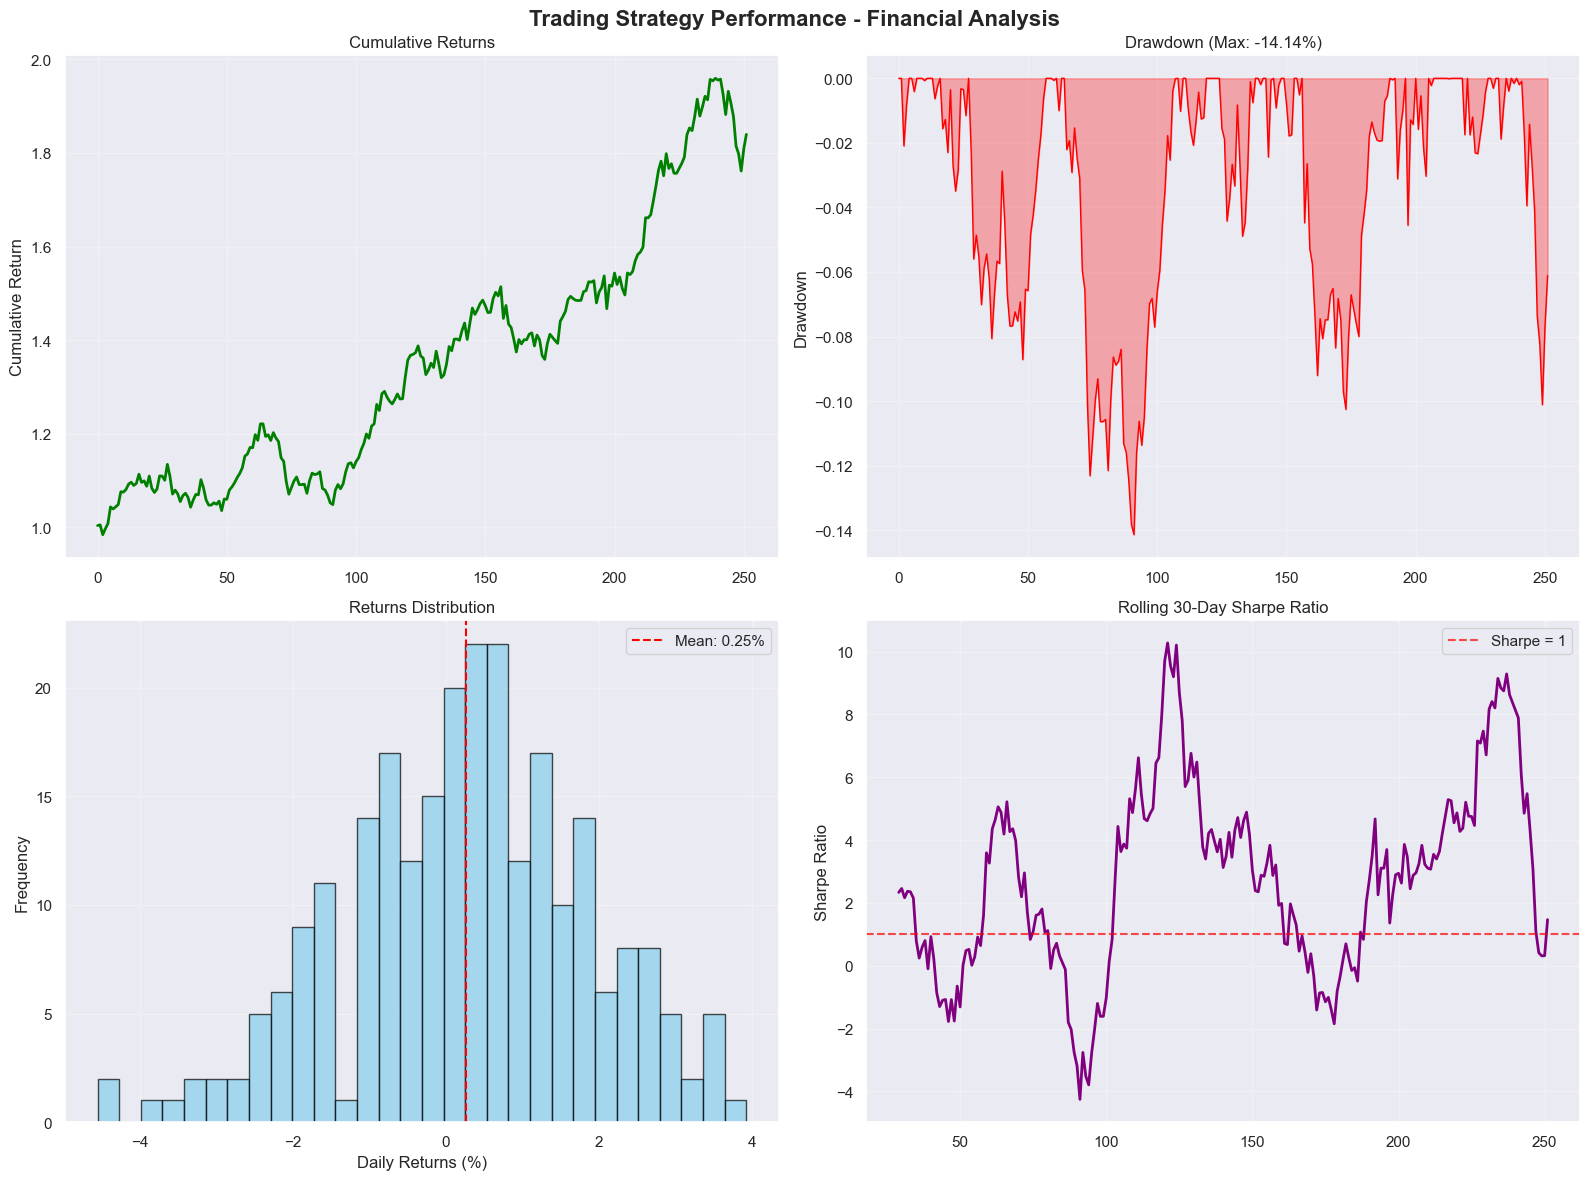


✅ Performance metrics demonstration completed!


In [9]:
print("=" * 60)
print("COMPREHENSIVE PERFORMANCE METRICS DEMONSTRATION")
print("=" * 60)

# Generate realistic sample data
np.random.seed(42)
n_samples = 252  # One year of daily data

# Regression example - Stock price prediction
true_prices = 100 + np.cumsum(np.random.normal(0.001, 0.02, n_samples))
pred_prices = true_prices + np.random.normal(0, 1, n_samples)

print("📊 REGRESSION METRICS EXAMPLE:")
print("-" * 40)
regression_metrics = RegressionMetrics.calculate_all_regression_metrics(
    true_prices, pred_prices, n_features=10
)

for metric, value in regression_metrics.items():
    print(f"{metric:20}: {value:.6f}")

# Classification example - Trading signals
true_signals = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])
pred_signals = np.random.choice([0, 1], size=n_samples, p=[0.65, 0.35])

print("\n🎯 CLASSIFICATION METRICS EXAMPLE:")
print("-" * 40)
classification_metrics = ClassificationMetrics.calculate_all_classification_metrics(
    true_signals, pred_signals
)

for metric, value in classification_metrics.items():
    print(f"{metric:20}: {value:.6f}")

# Financial example - Portfolio returns
returns = np.random.normal(0.0008, 0.016, n_samples)  # Realistic daily returns

print("\n💰 FINANCIAL METRICS EXAMPLE:")
print("-" * 40)
financial_metrics = FinancialMetrics.calculate_all_financial_metrics(
    returns, risk_free_rate=0.02
)

for metric, value in financial_metrics.items():
    if 'Rate' in metric or 'Return' in metric or 'Drawdown' in metric:
        print(f"{metric:20}: {value:.2%}")
    else:
        print(f"{metric:20}: {value:.6f}")

# Create visualizations
print("\n📈 GENERATING COMPREHENSIVE VISUALIZATIONS...")
MetricsVisualizer.plot_regression_metrics(true_prices, pred_prices, "Stock Price Prediction")
MetricsVisualizer.plot_financial_metrics(pd.Series(returns), "Trading Strategy Performance")

print("\n✅ Performance metrics demonstration completed!")


In [11]:
class MetricsReporter:
    """Export and report performance metrics for StockPredictionPro"""
    
    @staticmethod
    def generate_comprehensive_report(model_name, y_true, y_pred, returns=None, 
                                    n_features=None, export_path='C:\\Users\\Faraz\\Documents\\StockPredictionPro\\notebooks\\outputs'):
        """Generate comprehensive performance report"""
        report = {
            'model_name': model_name,
            'evaluation_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
            'sample_size': len(y_true)
        }
        
        # Regression metrics
        regression_metrics = RegressionMetrics.calculate_all_regression_metrics(
            y_true, y_pred, n_features
        )
        report.update({'regression_' + k: v for k, v in regression_metrics.items()})
        
        # Financial metrics (if returns provided)
        if returns is not None:
            financial_metrics = FinancialMetrics.calculate_all_financial_metrics(returns)
            report.update({'financial_' + k: v for k, v in financial_metrics.items()})
        
        # Export report
        import os
        os.makedirs(export_path, exist_ok=True)
        
        report_df = pd.DataFrame([report])
        filename = f"{export_path}/{model_name}_performance_report.csv"
        report_df.to_csv(filename, index=False)
        
        print(f"📊 Performance report exported: {filename}")
        return report
    
    @staticmethod
    def compare_models(model_reports):
        """Compare multiple model performance reports"""
        if not model_reports:
            print("❌ No model reports provided")
            return
        
        # Create comparison DataFrame
        comparison_df = pd.DataFrame(model_reports)
        
        # Key metrics for comparison
        key_metrics = [
            'regression_RMSE', 'regression_R²', 'regression_MAE',
            'financial_Sharpe_Ratio', 'financial_Maximum_Drawdown', 'financial_Win_Rate'
        ]
        
        available_metrics = [m for m in key_metrics if m in comparison_df.columns]
        
        if available_metrics:
            print("🏆 MODEL COMPARISON SUMMARY:")
            print("-" * 50)
            
            for metric in available_metrics:
                best_idx = comparison_df[metric].idxmin() if 'RMSE' in metric or 'Drawdown' in metric else comparison_df[metric].idxmax()
                best_model = comparison_df.loc[best_idx, 'model_name']
                best_value = comparison_df.loc[best_idx, metric]
                
                print(f"{metric:25}: {best_model} ({best_value:.6f})")
        
        return comparison_df

# Example usage
print("📋 PERFORMANCE REPORTING FRAMEWORK:")
print("-" * 40)

# Generate sample report
sample_report = MetricsReporter.generate_comprehensive_report(
    model_name="XGBoost_Demo",
    y_true=true_prices,
    y_pred=pred_prices,
    returns=pd.Series(returns),
    n_features=15
)

print(f"✅ Sample report generated for model: {sample_report['model_name']}")
print(f"   • Regression RMSE: {sample_report['regression_RMSE']:.6f}")
print(f"   • Financial Sharpe: {sample_report['financial_Sharpe_Ratio']:.6f}")

print("\n✅ Performance metrics framework ready for production use!")


📋 PERFORMANCE REPORTING FRAMEWORK:
----------------------------------------
📊 Performance report exported: C:\Users\Faraz\Documents\StockPredictionPro\notebooks\outputs/XGBoost_Demo_performance_report.csv
✅ Sample report generated for model: XGBoost_Demo
   • Regression RMSE: 1.000894
   • Financial Sharpe: 2.469632

✅ Performance metrics framework ready for production use!
